# USE CASE 02 - Read TESEO's forcing files

## Install pyTESEO
- If you are running this notebook from `Google colab` uncomment and run `!pip install pytest and pytest-run` in the cell below. 
Doing this you will install `pyteseo` from `pypi` repository and run `pyteseo-tests` to check the installation (all tests have to succeed).

- If you are using this notebook in your own local environement you should have installed all the requiered dependencies defined in `pyproject.toml` or `environment.yml`.

In [13]:
# !pip install pyteseo && pyteseo-tests

## Read TESEO's forcings files (currents and winds) and plot them.
1. Read bathymetry and coastline from TESEO's format files

In [14]:
import warnings

warnings.simplefilter(action="ignore")

import numpy as np
from matplotlib.animation import FuncAnimation
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc
from pathlib import Path
from pyteseo.io import read_currents, read_winds
import pyteseo.tests as tests_

# path where example data needed by the use case is located
data_path = Path(tests_.__file__).parent / "data"
lstcurr_path = data_path / "lstcurr_UVW.pre"
lstwinds_path = data_path / "lstwinds.pre"

In [15]:
currents_df, n_files, n_nodes = read_currents(lstcurr_path)
winds_df, n_files, n_nodes = read_winds(lstwinds_path)

currents_df.head(3), " ", " ", " ", winds_df.head(3)

(        lon       lat         u         v  time
 0  9.618706  43.98785 -3.765736  0.509148   0.0
 1  9.618706  44.11285 -3.765736  0.509148   0.0
 2  9.618706  44.23785 -3.765736  0.509148   0.0,
 ' ',
 ' ',
 ' ',
         lon       lat         u         v  time
 0  9.618706  43.98785 -3.765736  0.509148   0.0
 1  9.618706  44.11285 -3.765736  0.509148   0.0
 2  9.618706  44.23785 -3.765736  0.509148   0.0)

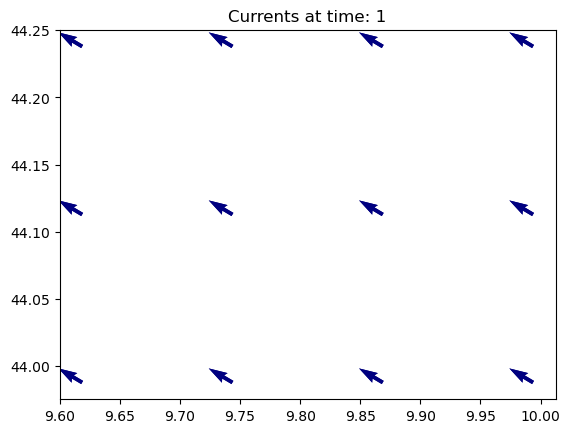

In [16]:
currents = [df for time, df in currents_df.groupby("time")]
winds = [df for time, df in winds_df.groupby("time")]
times = [time for time, df in winds_df.groupby("time")]

time = 1
mod_currents = np.sqrt(currents[time].u ** 2 + currents[time].v ** 2)
mod_winds = np.sqrt(currents[time].u ** 2 + currents[time].v ** 2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
q1 = ax.quiver(
    currents[time].lon,
    currents[time].lat,
    currents[time].u,
    currents[time].v,
    mod_currents,
    cmap="jet",
)
q2 = ax.quiver(
    winds[time].lon,
    winds[time].lat,
    winds[time].u,
    winds[time].v,
    mod_winds,
    cmap="jet",
)

title = ax.set_title(f"Currents at time: {time}")